In [1]:
import pandas as pd
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access the file in Google Drive
fp = '/content/drive/MyDrive/Dataset/InSDN_DatasetCSV/OVS.csv'

In [3]:
# Read the CSV file into a Pandas dataframe
df = pd.read_csv(fp)
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,4045,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
1,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,284,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
2,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,4302,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
3,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,83,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
4,172.17.0.2-200.175.2.130-80-48860-6,200.175.2.130,48860,172.17.0.2,80,6,12/1/2020 1:14,3760,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138717,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440,172.17.0.2,80,6,25/12/2019 05:19:55 PM,296,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
138718,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,3431,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
138719,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,4121,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
138720,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,5887,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


# **Data Preprocessing**

In [4]:
#Missing values
df.isnull().sum().any() #No missing Values available

False

In [5]:
#Duplicate values checking
df.duplicated()
#Removing duplicate values
df.drop_duplicates(inplace = True)

In [6]:
df.shape #New Dataset Size

(138722, 84)

In [7]:
df.dtypes

Flow ID       object
Src IP        object
Src Port       int64
Dst IP        object
Dst Port       int64
              ...   
Idle Mean    float64
Idle Std     float64
Idle Max     float64
Idle Min     float64
Label         object
Length: 84, dtype: object

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.decomposition import PCA

# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].astype(str)
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# **Fetaure Selection using Correlation Analysis, Mutual Information, and Principal Component Analysis**

In [9]:
# Split dataset into features and labels
X = df.drop('Label', axis=1)
y = df['Label']
# Convert the target variable y to a discrete variable
y = pd.cut(y, bins=10, duplicates='drop', labels=False)

# Correlation analysis
corr = X.corr()
corr_abs = corr.abs()
relevant_features_corr = corr_abs[corr_abs > 0.5].index.tolist()

# Mutual information
mutual_info = SelectKBest(mutual_info_classif, k=20).fit(X, y)
relevant_features_mutual = X.columns[mutual_info.get_support()].tolist()

# PCA
pca = PCA(n_components=20)
pca.fit(X)
relevant_features_pca = X.columns[pca.components_.argmax(axis=1)].tolist()

# Combine relevant features from all three methods
relevant_features = list(set().union(relevant_features_corr, relevant_features_mutual, relevant_features_pca))

# **Splitting the Dataset into Train with Relevant Features and Testing**

In [10]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# **Model Developing with Ensemble (Random Forest) Classifier**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with all algorithms
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=42, verbose=0, warm_start=False,
                            class_weight=None, ccp_alpha=0.0, max_samples=None)

start_time = time.time()#Training time starting

# Fit model
rf.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting


# Make predictions on test set
y_pred = rf.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)


# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)


print("Balanced Accuracy (BACC): ", bacc)


error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = rf.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')


# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")



# Convert y_test to binary labels
y_test_binary = [1 if y == 9 else 0 for y in y_test]

# Get predicted probabilities for positive class
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute True Positive Rate and False Positive Rate at different thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, y_prob)


# Calculate AUC score
y_prob = rf.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_score_rf = roc_auc_score(y_test, y_prob_normalized, average='macro', multi_class='ovo')
# Print AUC score
print(f'AUC(Area Under the ROC Curve) score: {auc_score_rf:.5f}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000
Training time: 1.67031 seconds
Testing Time: 0.04053 seconds
Confusion Matrix:
[[  227     0     0     0     0     0]
 [    0    33     0     0     0     0]
 [    0     0  9774     0     0     0]
 [    0     0     0 10453     0     0]
 [    0     0     0     0  7219     0]
 [    0     0     0     0     0    39]]
TP: 33
FP: 0
FN: 0
TN: 227
True Positive Rate (TPR): 1.00000
False Positive Rate (FPR): 0.00000
Balanced Accuracy (BACC):  1.0
Error rate: 0.00000
Training accuracy: 0.99999
Test Accuracy: 1.00000
Cohen's Kappa: 1.00000
Observed Accuracy (Po): 1.00000
Expected Accuracy (Pe): 0.33381
AUC(Area Under the ROC Curve) score: 1.00000


# **Feature importance scores**

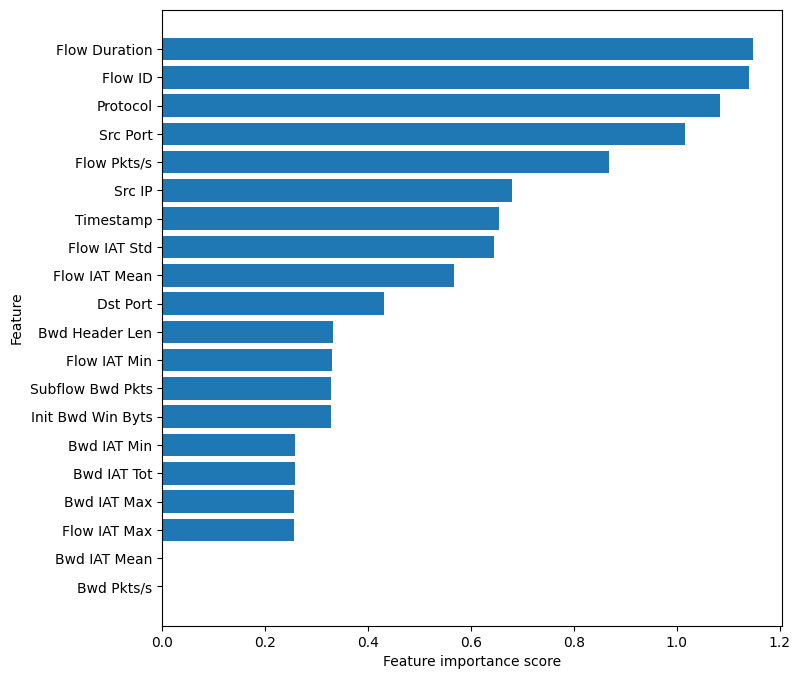

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
import matplotlib.pyplot as plt
feature_scores = mutual_info.scores_

# Create a dictionary to store the feature importance scores
feature_importance = dict(zip(relevant_features_mutual, feature_scores))

# Sort the dictionary by feature importance scores in descending order
feature_importance_sorted = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Plot the feature importance scores
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(range(len(feature_importance_sorted)), list(feature_importance_sorted.values()), align='center')
ax.set_yticks(range(len(feature_importance_sorted)))
ax.set_yticklabels(list(feature_importance_sorted.keys()))
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature importance score')
ax.set_ylabel('Feature')
#plt.title('Feature importance scores', fontsize=16)
plt.show()

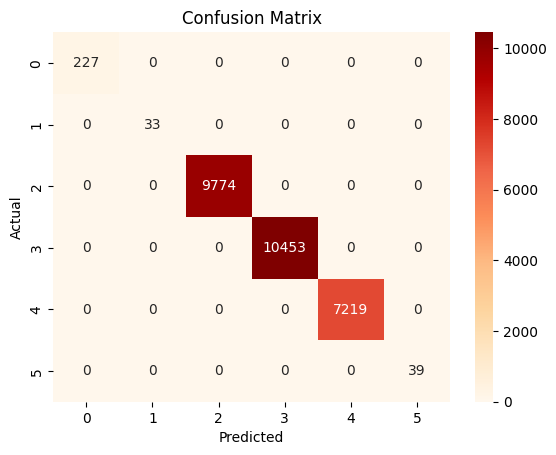

In [13]:
# Visualization of confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **ROC Curve with TPR and FPR in a Figure**

AUC Score: 0.49935032123005846
AUC Score: 0.4994


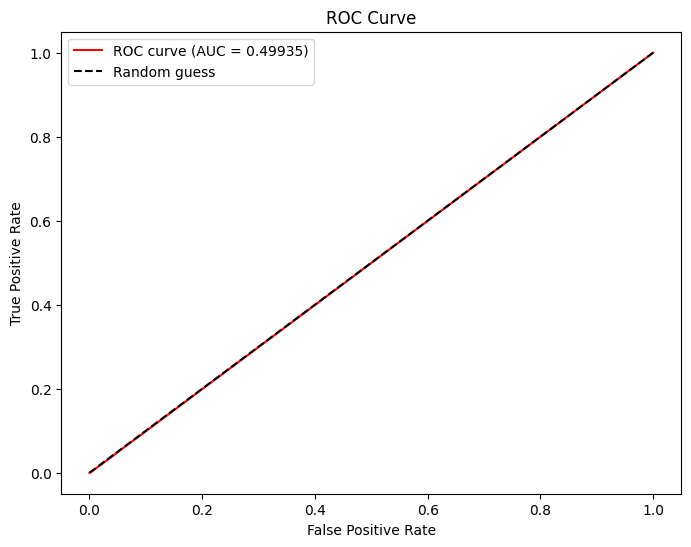

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert y_test to binary labels
y_test_binary = [1 if y == 9 else 0 for y in y_test]

# Get predicted probabilities for positive class
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute True Positive Rate and False Positive Rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test_binary, y_prob)

print("AUC Score:", auc_score)
print(f'AUC Score: {auc_score:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC curve (AUC = {:.5f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Log-Loss plot with respect to predicted probabilities**

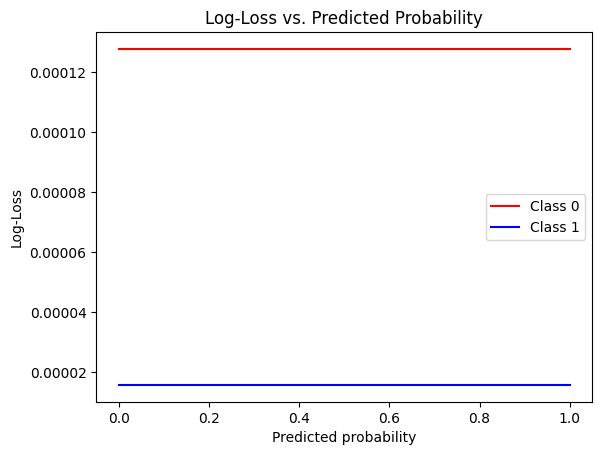

In [15]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
# Get predicted probabilities for test set
y_prob = rf.predict_proba(X_test)
lb = LabelBinarizer()
y_true_one_hot = lb.fit_transform(y_test)
# Calculate mean log-loss for each class
log_losses = [log_loss(y_true_one_hot[:, i], y_prob[:, i]) for i in range(len(rf.classes_))]

# Plot log-loss values against predicted probabilities
plt.plot([y_prob[:, 0].min(), y_prob[:, 0].max()], [log_losses[0], log_losses[0]], 'r-', label='Class 0')
plt.plot([y_prob[:, 1].min(), y_prob[:, 1].max()], [log_losses[1], log_losses[1]], 'b-', label='Class 1')
plt.xlabel('Predicted probability')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs. Predicted Probability')
plt.legend()
plt.show()

# **Accuracy of the Model When the Number of Trees in Random Forest is changing**

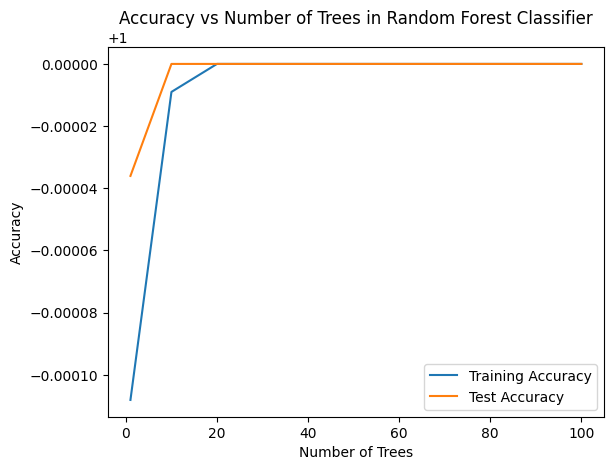

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Create a list of the number of trees to test
n_trees = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create empty lists to store accuracy values for each number of trees
train_accuracy = []
test_accuracy = []

# Loop through each number of trees
for n in n_trees:
    # Create a random forest classifier with n trees
    rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    # Fit the model on the training data
    rf.fit(X_train, y_train)
    # Calculate accuracy on training data
    train_acc = rf.score(X_train, y_train)
    #print (train_acc)
    # Append the training accuracy to the list
    train_accuracy.append(train_acc)
    # Calculate accuracy on test data
    y_pred = rf.predict(X_test)

    # Calculate accuracy on test set
    test_acc = accuracy_score(y_test, y_pred)
    #print(test_acc)

    # Append the test accuracy to the list
    test_accuracy.append(test_acc)

# Create a line plot of the accuracy vs number of trees
plt.plot(n_trees, train_accuracy, label='Training Accuracy')
plt.plot(n_trees, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in Random Forest Classifier')
plt.legend()
plt.show()

# **Visualization of Real and Predicted data for RF Classifier**

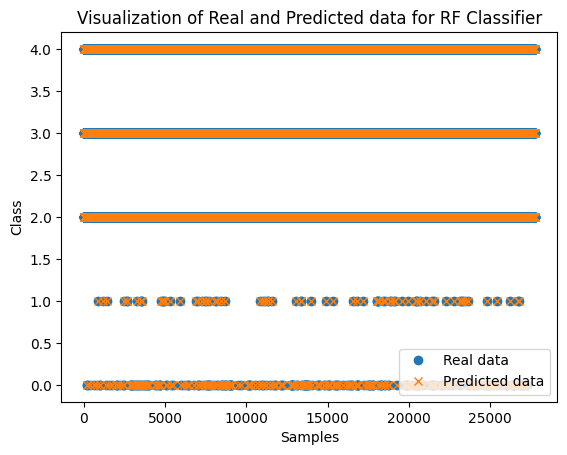

In [72]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test, 'o', label='Real data')
plt.plot(y_pred, 'x', label='Predicted data')
plt.title('Visualization of Real and Predicted data for RF Classifier')
plt.xlabel('Samples')
plt.ylabel('Class')
plt.legend()
plt.show()

# **Model Developing with Ensemble (Bagging) Classifier**

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import cohen_kappa_score
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)
# Initialize individual classifiers

tree = DecisionTreeClassifier()


# Initialize Bagging classifier with all algorithms
bagging = BaggingClassifier(base_estimator=tree, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=42, verbose=0)



start_time = time.time()#Training time starting

# Fit model
bagging.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting


# Make predictions on test set
y_pred = bagging.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)


# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')
# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)
print("BACC: ", bacc)
error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = bagging.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')


# Make predictions on test set
y_pred = bagging.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")






# Calculate AUC score
y_prob = bagging.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_score_bg = roc_auc_score(y_test, y_prob_normalized, average='macro', multi_class='ovo')
# Print AUC score
print(f'AUC(Area Under the ROC Curve) score: {auc_score_bg:.5f}')



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.99996
Precision: 0.99996
Recall: 0.99996
F1-score: 0.99996
Training time: 14.01851 seconds
Testing Time: 0.10577 seconds
Confusion Matrix:
[[  227     0     0     0     0]
 [    0    72     0     0     0]
 [    0     0  9774     0     0]
 [    0     0     0 10452     1]
 [    0     0     0     0  7219]]
TP: 72
FP: 0
FN: 0
TN: 227
True Positive Rate (TPR): 1.00000
False Positive Rate (FPR): 0.00000
BACC:  1.0
Error rate: 0.00004
Training accuracy: 1.00000
Test Accuracy: 0.99996
Cohen's Kappa: 0.99995
Observed Accuracy (Po): 0.99996
Expected Accuracy (Pe): 0.33381
AUC(Area Under the ROC Curve) score: 1.00000


# **Model Developing with Ensemble (Adaboost/DT) Techniques**

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)
# Define base classifiers
dt = DecisionTreeClassifier(max_depth=1)

# Define AdaBoost classifier with base classifiers
ada = AdaBoostClassifier(estimator=dt, n_estimators=10, learning_rate=1.0, algorithm='SAMME')

start_time = time.time()#Training time starting

# Train model
ada.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting

# Test model
yboost_pred = ada.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, yboost_pred)
precision = precision_score(y_test, yboost_pred,  pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, yboost_pred,  pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, yboost_pred,  pos_label='positive',average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = ada.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')

# Make predictions on test set
yboost_pred = ada.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, yboost_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, yboost_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")



# Calculate AUC score
y_prob = ada.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_score_ab = roc_auc_score(y_test, y_prob_normalized, average='macro', multi_class='ovo')
# Print AUC score
print(f'AUC(Area Under the ROC Curve) score: {auc_score_ab:.5f}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.98580
Precision: 0.98580
Recall: 0.98580
F1-score: 0.98580
Training time: 5.06432 seconds
Testing Time: 0.07525 seconds
Confusion Matrix:
[[  227     0     0     0     0]
 [    0    72     0     0     0]
 [    0     0  9774     0     0]
 [    0     0     0 10452     1]
 [    0     0     0     0  7219]]
TP: 72
FP: 0
FN: 0
TN: 227
True Positive Rate (TPR): 1.00000
False Positive Rate (FPR): 0.00000
BACC:  1.0
MCC:  1.0
Error rate: 0.01420
Training accuracy: 0.98630
Test Accuracy: 0.98580
Cohen's Kappa: 0.97859
Observed Accuracy (Po): 0.99996
Expected Accuracy (Pe): 0.33381
AUC(Area Under the ROC Curve) score: 0.98234


# **Model Developing with Ensemble (Gradient Boosting) Techniques**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Define base classifier
dt = DecisionTreeClassifier(max_depth=1)

# Define Gradient Boosting classifier with base classifier
gb = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=10, max_depth=3)

start_time = time.time() # Training time starting

# Train model
gb.fit(X_train, y_train)

end_time = time.time() # Training time ending
training_time = end_time - start_time

start_pred_time = time.time() # Testing time starting

# Test model
ygb_pred = gb.predict(X_test)

end_pred_time = time.time() # Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, ygb_pred)
precision = precision_score(y_test, ygb_pred, pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, ygb_pred, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, ygb_pred, pos_label='positive',average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, ygb_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.4f}')
print(f'False Positive Rate (FPR): {FPR:.4f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 4)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - test_accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = gb.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')


# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, ygb_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, ygb_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")

# Calculate AUC score
y_prob = gb.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_score_gb = roc_auc_score(y_test, y_prob_normalized, average='macro', multi_class='ovo')
# Print AUC score
print(f'AUC(Area Under the ROC Curve) score: {auc_score_gb:.5f}')



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos

Accuracy: 0.99964
Precision: 0.99964
Recall: 0.99964
F1-score: 0.99964
Training time: 44.16656 seconds
Testing Time: 0.04826 seconds
Confusion Matrix:
[[  227     0     0     0     0]
 [    0    66     0     0     6]
 [    0     0  9774     0     0]
 [    0     0     0 10453     0]
 [    0     0     0     4  7215]]
TP: 66
FP: 0
FN: 0
TN: 227
True Positive Rate (TPR): 1.0000
False Positive Rate (FPR): 0.0000
BACC:  1.0
MCC:  1.0
Error rate: 0.01420
Training accuracy: 0.99954
Test Accuracy: 0.99964
Cohen's Kappa: 0.99946
Observed Accuracy (Po): 0.99964
Expected Accuracy (Pe): 0.33389
AUC(Area Under the ROC Curve) score: 0.99984


# **Model Developing with Ensemble (Gradient XGBoost) Techniques**

In [21]:
from xgboost import XGBClassifier
# Replace 9s with 1s in y
y = np.where(y == 9, 1, y)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)



# Define XGBoost classifier
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

start_time = time.time() # Training time starting

# Train model
xgb.fit(X_train, y_train)

end_time = time.time() # Training time ending
training_time = end_time - start_time

start_pred_time = time.time() # Testing time starting

# Test model
y_xgb_pred = xgb.predict(X_test)

end_pred_time = time.time() # Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_xgb_pred)
precision = precision_score(y_test, y_xgb_pred,average='micro', zero_division=1)
recall = recall_score(y_test, y_xgb_pred,average='micro', zero_division=1)
f1 = f1_score(y_test, y_xgb_pred,average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_xgb_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - test_accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = xgb.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')


# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_xgb_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_xgb_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.4f}")

# Calculate AUC score
y_prob = xgb.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_scores_xgb = roc_auc_score(y_test, y_prob_normalized, average='macro',multi_class='ovr')

# Print the overall AUC score
print(f'Overall AUC(Area Under the ROC Curve) score: {auc_scores_xgb:.5f}')







Accuracy: 0.99996
Precision: 0.99996
Recall: 0.99996
F1-score: 0.99996
Training time: 127.72502 seconds
Testing Time: 0.11256 seconds
Confusion Matrix:
[[  227     0     0     0     0]
 [    0    72     0     0     0]
 [    0     0  9774     0     0]
 [    0     1     0 10452     0]
 [    0     0     0     0  7219]]
TP: 72
FP: 0
FN: 0
TN: 227
True Positive Rate (TPR): 1.00000
False Positive Rate (FPR): 0.00000
BACC:  1.0
MCC:  1.0
Error rate: 0.00025
Training accuracy: 1.00000
Test Accuracy: 0.99996
Cohen's Kappa: 0.99995
Observed Accuracy (Po): 0.99996
Expected Accuracy (Pe): 0.3338
Overall AUC(Area Under the ROC Curve) score: 1.00000


# **Model Developing with Ensemble (Simple Stacking) Techniques**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.25, random_state=42)
# Initialize base classifiers
rfc =  RandomForestClassifier()
tree = DecisionTreeClassifier()
nb = GaussianNB()


start_time = time.time() # Training time starting

# Fit base classifiers on training set
rfc.fit(X_train, y_train)
tree.fit(X_train, y_train)
nb.fit(X_train, y_train)
end_time = time.time() # Training time ending
training_time = end_time - start_time

start_pred_time = time.time() # Testing time starting

# Make predictions on validation set using base classifiers
rfc_pred = rfc.predict(X_test)
tree_pred = tree.predict(X_test)
nb_pred = nb.predict(X_test)

# Combine base classifiers' predictions as meta-features
meta_features = np.column_stack((rfc_pred, tree_pred, nb_pred))

# Train logistic regression meta-classifier on meta-features
meta_classifier = LogisticRegression(random_state=42)
meta_classifier.fit(meta_features, y_test)

start_pred_time = time.time() # Testing time starting

# Make predictions on test set using ensemble model
rfc_pred_test = rfc.predict(X_test)
tree_pred_test = tree.predict(X_test)
nb_pred_test = nb.predict(X_test)

meta_features_test = np.column_stack((rfc_pred_test, tree_pred_test, nb_pred_test))
ensemble_pred_test = meta_classifier.predict(meta_features_test)

end_pred_time = time.time() # Testing time ending

# Evaluate ensemble model performance
accuracy = accuracy_score(y_test, ensemble_pred_test)
precision = precision_score(y_test, ensemble_pred_test,pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, ensemble_pred_test, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, ensemble_pred_test,pos_label='positive',average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')


# Calculate confusion matrix
cm = confusion_matrix(y_test, ensemble_pred_test)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)

# Calculate MCC
mcc = round((TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5, 5)

print("BACC: ", bacc)
print("MCC: ", mcc)

error_rate = 1 - test_accuracy
print(f'Error rate: {error_rate:.5f}')

# Calculate training accuracy
# Make predictions on training set using ensemble model
rfc_pred_train = rfc.predict(X_train)
tree_pred_train = tree.predict(X_train)
nb_pred_train = nb.predict(X_train)

meta_features_train = np.column_stack((rfc_pred_train, tree_pred_train, nb_pred_train))
ensemble_pred_train = meta_classifier.predict(meta_features_train)

# Evaluate ensemble model performance on training set
accuracy_train = accuracy_score(y_train, ensemble_pred_train)

# Print metrics
print(f'Training Accuracy: {accuracy_train:.5f}')



# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, ensemble_pred_test)

print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, ensemble_pred_test)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")

# Calculate AUC score
y_prob = meta_classifier.predict_proba(meta_features_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_scores_st = roc_auc_score(y_test, y_prob_normalized, average='macro',multi_class='ovr')

# Print the overall AUC score
print(f'Overall AUC(Area Under the ROC Curve) score: {auc_scores_st:.5f}')





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to s

Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000
Training time: 23.16031 seconds
Testing Time: 0.50743 seconds
Confusion Matrix:
[[  289     0     0     0     0]
 [    0    83     0     0     0]
 [    0     0 12208     0     0]
 [    0     0     0 13039     0]
 [    0     0     0     0  9062]]
TP: 83
FP: 0
FN: 0
TN: 289
True Positive Rate (TPR): 1.00000
False Positive Rate (FPR): 0.00000
BACC:  1.0
MCC:  1.0
Error rate: 0.00000
Training Accuracy: 1.00000
Test Accuracy: 1.00000
Cohen's Kappa: 1.00000
Observed Accuracy (Po): 1.00000
Expected Accuracy (Pe): 0.33361
Overall AUC(Area Under the ROC Curve) score: 1.00000


# **Model Developing with Logistic Regression Classifier**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import matthews_corrcoef
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
lr = LogisticRegression(random_state=42)

start_time = time.time()#Training time starting

# Fit model
lr.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting

# Make predictions on test set
y_pred = lr.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)
print("Balanced Accuracy (BACC): ", bacc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = lr.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")





# Calculate AUC score
y_prob = lr.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_scores_lr = roc_auc_score(y_test, y_prob_normalized, average='macro',multi_class='ovr')

# Print the overall AUC score
print(f'Overall AUC(Area Under the ROC Curve) score: {auc_scores_lr:.5f}')




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to s

Accuracy: 0.88340
Precision: 0.88340
Recall: 0.88340
F1-score: 0.88340
Training time: 15.76226 seconds
Testing Time: 0.05444 seconds
Confusion Matrix:
[[ 223    0    0    0    4]
 [  37    0   33    0    2]
 [  70    0 9445   74  185]
 [   0    0 1726 8727    0]
 [  29    0   27 1048 6115]]
TP: 0
FP: 0
FN: 37
TN: 223
True Positive Rate (TPR): 0.00000
False Positive Rate (FPR): 0.00000
Balanced Accuracy (BACC):  0.5
Error rate: 0.11660
Training accuracy: 0.88803
Test Accuracy: 0.88340
Cohen's Kappa: 0.82451
Observed Accuracy (Po): 0.88340
Expected Accuracy (Pe): 0.33558
Overall AUC(Area Under the ROC Curve) score: 0.81665


# **Model Developing with Gaussian Naive Bayes Classifier**

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import matthews_corrcoef
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

start_time = time.time()#Training time starting

# Fit model
gnb.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting

# Make predictions on test set
y_pred = gnb.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)
print("Balanced Accuracy (BACC): ", bacc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = gnb.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")






# Calculate AUC score
y_prob = gnb.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_scores_gnb = roc_auc_score(y_test, y_prob_normalized, average='macro',multi_class='ovr')

# Print the overall AUC score
print(f'Overall AUC(Area Under the ROC Curve) score: {auc_scores_gnb:.5f}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.90463
Precision: 0.90463
Recall: 0.90463
F1-score: 0.90463
Training time: 0.28255 seconds
Testing Time: 0.08709 seconds
Confusion Matrix:
[[ 223    4    0    0    0]
 [   8   52    1    0   11]
 [   0    0 9774    0    0]
 [   0 2568    0 7865   20]
 [   0   29    0    5 7185]]
TP: 52
FP: 4
FN: 8
TN: 223
True Positive Rate (TPR): 0.86667
False Positive Rate (FPR): 0.01762
Balanced Accuracy (BACC):  0.92452
Error rate: 0.09537
Training accuracy: 0.90460
Test Accuracy: 0.90463
Cohen's Kappa: 0.86396
Observed Accuracy (Po): 0.90463
Expected Accuracy (Pe): 0.29897
Overall AUC(Area Under the ROC Curve) score: 0.98329


# **Model Developing with K-Nearest Neighbors (KNN) Classifier**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import matthews_corrcoef
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

start_time = time.time()#Training time starting

# Fit model
knn.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting

# Make predictions on test set
y_pred = knn.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)
print("Balanced Accuracy (BACC): ", bacc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')
# Calculate false positive rate (FPR) and true positive rate (TPR) at different thresholds


train_accuracy = knn.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")




# Calculate AUC score
y_prob = knn.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_scores_knn = roc_auc_score(y_test, y_prob_normalized, average='macro',multi_class='ovr')

# Print the overall AUC score
print(f'Overall AUC(Area Under the ROC Curve) score: {auc_scores_knn:.5f}')



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.99993
Precision: 0.99993
Recall: 0.99993
F1-score: 0.99993
Training time: 0.16728 seconds
Testing Time: 36.99041 seconds
Confusion Matrix:
[[  227     0     0     0     0]
 [    0    72     0     0     0]
 [    0     0  9774     0     0]
 [    0     0     0 10453     0]
 [    0     1     0     1  7217]]
TP: 72
FP: 0
FN: 0
TN: 227
True Positive Rate (TPR): 1.00000
False Positive Rate (FPR): 0.00000
Balanced Accuracy (BACC):  1.0
Error rate: 0.00007
Training accuracy: 0.99992
Test Accuracy: 0.99993
Cohen's Kappa: 0.99989
Observed Accuracy (Po): 0.99993
Expected Accuracy (Pe): 0.33381
Overall AUC(Area Under the ROC Curve) score: 0.99998


# **Model Developing with Artificial Neural Network (ANN)**

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import matthews_corrcoef
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)

start_time = time.time()#Training time starting

# Fit model
mlp.fit(X_train, y_train)

end_time = time.time()#Training time ending
training_time = end_time - start_time

start_pred_time = time.time()#Testing time starting

# Make predictions on test set
y_pred = mlp.predict(X_test)

end_pred_time = time.time()#Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label='positive',average='micro', zero_division=1)


# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)
print("Balanced Accuracy (BACC): ", bacc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')


train_accuracy = mlp.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")

# Get predicted probabilities
y_pred_proba = mlp.predict_proba(X_test)[:,1]

# Calculate AUC score
y_prob = mlp.predict_proba(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_scores_mlp = roc_auc_score(y_test, y_prob_normalized, average='macro',multi_class='ovr')

# Print the overall AUC score
print(f'Overall AUC(Area Under the ROC Curve) score: {auc_scores_mlp:.5f}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Confusion Matrix:
[[  227     0     0     0     0]
 [    0    72     0     0     0]
 [    0     0  9774     0     0]
 [    0     0     0 10453     0]
 [    0     1     0     1  7217]]
Accuracy: 0.66513
Precision: 0.66513
Recall: 0.66513
F1-score: 0.66513
Training time: 179.35427 seconds
Testing Time: 0.51977 seconds
Confusion Matrix:
[[  223     0     0     0     4]
 [   37    32     1     0     2]
 [    0     0  2373  7401     0]
 [    0     0     0 10453     0]
 [    7     0     0  1839  5373]]
TP: 32
FP: 0
FN: 37
TN: 223
True Positive Rate (TPR): 0.46377
False Positive Rate (FPR): 0.00000
Balanced Accuracy (BACC):  0.73188
Error rate: 0.33487
Training accuracy: 0.66949
Test Accuracy: 0.66513
Cohen's Kappa: 0.48633
Observed Accuracy (Po): 0.66513
Expected Accuracy (Pe): 0.34808
Overall AUC(Area Under the ROC Curve) score: 0.86983


# **Model Developing with Support Vector Machine (SVM)**

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
import time
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.05, train_size=0.005, random_state=42)
# Initialize SVM classifier
svm = SVC(kernel='linear', random_state=42)

start_time = time.time() #Training time starting

# Fit model
svm.fit(X_train, y_train)

end_time = time.time() #Training time ending
training_time = end_time - start_time

start_pred_time = time.time() #Testing time starting

# Make predictions on test set
y_pred = svm.predict(X_test)

end_pred_time = time.time() #Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='micro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print TPR and FPR
print(f'True Positive Rate (TPR): {TPR:.5f}')
print(f'False Positive Rate (FPR): {FPR:.5f}')

# Calculate BACC
bacc = round((TP / (TP + FN) + TN / (TN + FP)) / 2, 5)
print("Balanced Accuracy (BACC): ", bacc)

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = svm.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.5f}')

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")




# Calculate AUC score
y_prob = svm.decision_function(X_test)
y_prob_normalized = y_prob / y_prob.sum(axis=1, keepdims=True)  # Normalize probabilities
auc_scores_svm = roc_auc_score(y_test, y_prob_normalized, average='macro',multi_class='ovr')

# Print the overall AUC score
print(f'Overall AUC(Area Under the ROC Curve) score: {auc_scores_svm:.5f}')

Accuracy: 0.98847
Precision: 0.98847
Recall: 0.98847
F1-score: 0.98847
Training time: 16.18374 seconds
Testing Time: 0.03714 seconds
Confusion Matrix:
[[  51    1    0    0    0]
 [   8    8    1    0    0]
 [   0    0 2422    0    0]
 [   0    0    0 2607    9]
 [   1    0    0   60 1769]]
TP: 8
FP: 1
FN: 8
TN: 51
True Positive Rate (TPR): 0.50000
False Positive Rate (FPR): 0.01923
Balanced Accuracy (BACC):  0.74038
Error rate: 0.01153
Training accuracy: 0.98701
Test Accuracy: 0.98847
Cohen's Kappa: 0.98267
Observed Accuracy (Po): 0.98847
Expected Accuracy (Pe): 0.33462
Overall AUC(Area Under the ROC Curve) score: 0.93986
